# Modules to Import


In [1]:
import sys
import numpy as np
import pandas as pd
from scipy import constants

from astropy.modeling.models import BlackBody
from astropy import units as u

from matplotlib import pyplot as plt

In [2]:
# If remounting (i.e. to reload updated data), run cell twice
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
sys.path.insert(0, '/content/gdrive/MyDrive/Colab Notebooks/')
from wtdlib import color_sci

# Plotting Using AM1.5E

In [4]:
df = color_sci.df_am1_5()
display(df.head())
print(df.columns)

,Wavelength,AM 1.5E,AM 1.5G,AM 1.5D
0,280.0,0.082,4.730900e-23,2.536100e-26
1,280.5,0.099,1.230700e-21,1.091700e-24
2,281.0,0.150,5.689500e-21,6.125300e-24
3,281.5,0.212,1.566200e-19,2.747900e-22
4,282.0,0.267,1.194600e-18,2.834600e-21


Index(['Wavelength', 'AM 1.5E', 'AM 1.5G', 'AM 1.5D'], dtype='object')


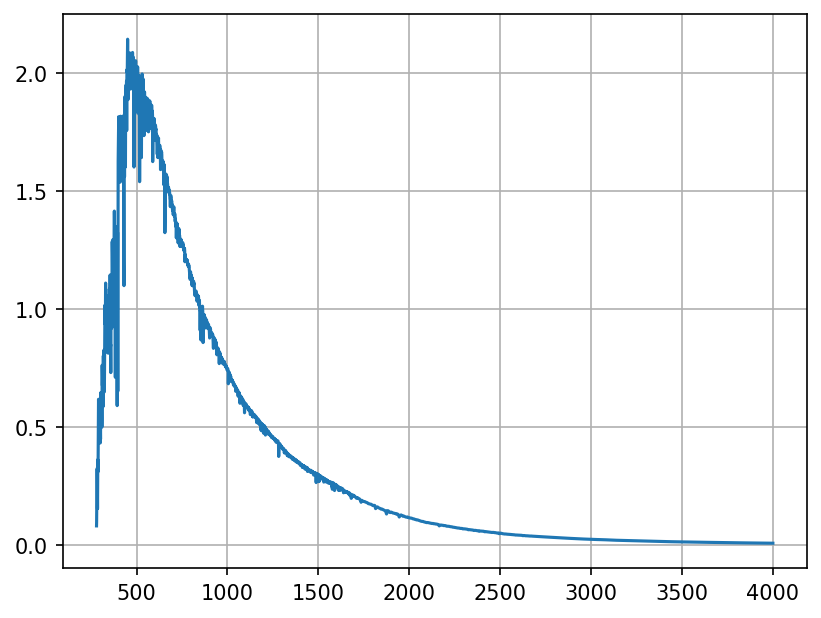

In [5]:
plt.style.use('seaborn-v0_8')
plt.style.use('default')
fig, axes = plt.subplots(nrows=1, ncols=1, dpi=150)
axes.plot(df['Wavelength'], df['AM 1.5E'])
plt.grid(True)
plt.show()

# Plot Using Planck's Law
https://en.wikipedia.org/wiki/Planck%27s_law


In [6]:
wavelengths = df['Wavelength'].values*1e-9
frequencies = constants.c/wavelengths
frequencies = frequencies.astype(np.longdouble)
print(wavelengths[0], wavelengths[-1])
print(frequencies[0], frequencies[-1])

2.8e-07 4.000000000000001e-06
1070687349999999.875 74948114499999.984375


## Intensity vs Wavelength

$B_{\lambda}(\lambda, T) = \frac{2hc^{2}}{\lambda^{5}} \frac{1}{e^\frac{hc}{\lambda k T} - 1} $

In [7]:
def planck_lambda(wavelength, temperature):
    h = constants.Planck
    c = constants.c
    k = constants.k

    term_exponent = h*c/(wavelength*k*temperature)

    numerator = (2.0)*(h)*(c)**2
    denominator = (wavelength**5)*(np.exp(term_exponent)-1.0)

    return (numerator/denominator).astype(np.longdouble)

In [8]:
sun_lambda = planck_lambda(wavelengths, 5570)
sun_lambda[0], sun_lambda[-1]

(np.longdouble('6818450825199.6279297'),
 np.longdouble('128174531510.392211914'))

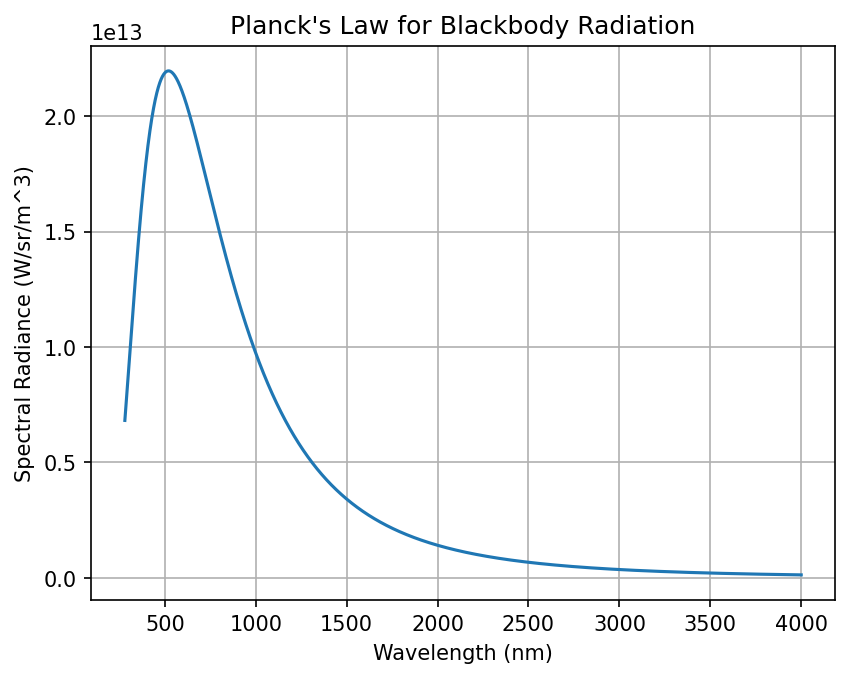

In [9]:
plt.style.use('seaborn-v0_8')
plt.style.use('default')
fig, axes = plt.subplots(nrows=1, ncols=1, dpi=150)
axes.plot(wavelengths*1e9, sun_lambda)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Spectral Radiance (W/sr/m^3)')
plt.title('Planck\'s Law for Blackbody Radiation')
plt.grid(True)
plt.show()

## Intensity vs Frequency

$B_{\nu}(\nu, T) = \frac{2h \nu^{3}}{c^{2}} \frac{1}{e^\frac{h \nu}{k T} - 1} $

In [10]:
def planck_freq(nu, temperature):
    h = constants.Planck
    c = constants.c
    k = constants.k

    term_exponent = ((h*nu.astype(np.longdouble)
        / (k*temperature)).astype(np.longdouble) )

    numerator = 2.0*h*(nu.astype(np.longdouble))**3
    # denominator = (c**2)*(np.exp(term_exponent) - 1.0)

    denominator = c**2 * (np.exp((h * nu) / (k * temperature)) - 1)

    # denominator = (c**2)*(np.expm1(term_exponent))

    return numerator/denominator

In [11]:
sun_nu = planck_freq(frequencies, 5570)
sun_nu[0], sun_nu[-1]

(np.longdouble('1.7831220580460726407e-09'),
 np.longdouble('6.8407074609137628966e-09'))

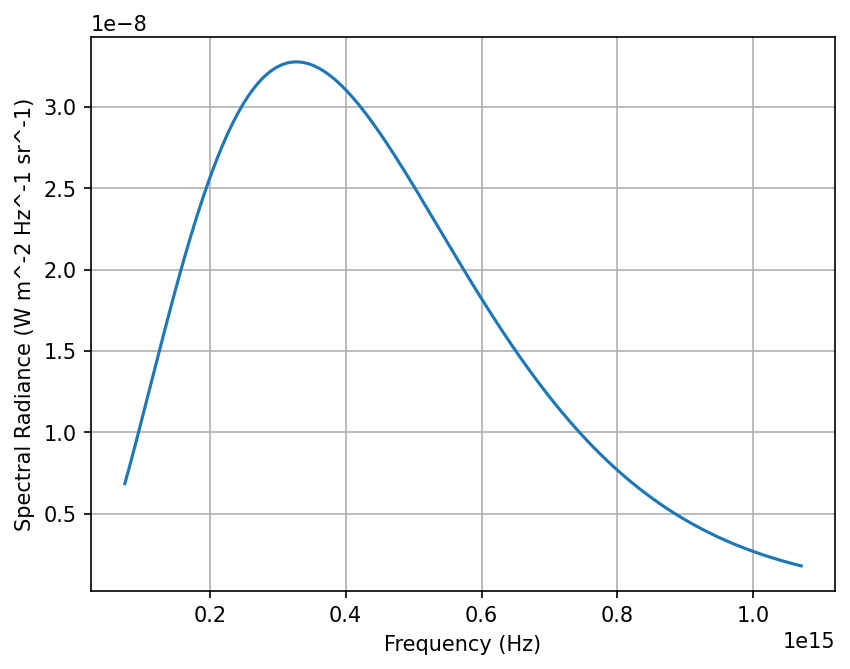

In [12]:
plt.style.use('seaborn-v0_8')
plt.style.use('default')
fig, axes = plt.subplots(nrows=1, ncols=1, dpi=150)
# axes.plot(wavelengths*1e9, sun_nu)

axes.plot(frequencies, sun_nu)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Spectral Radiance (W m^-2 Hz^-1 sr^-1)')
plt.grid(True)
plt.show()

# Using Astropy

## Intensity vs Wavelength

In [37]:
bb = BlackBody(5570. * u.Kelvin)
lambdas = wavelengths*u.m
lambdas[0], lambdas[-1]

(<Quantity 2.8e-07 m>, <Quantity 4.e-06 m>)

In [42]:
bb_intensity = bb(lambdas) # cgs
bb_intensity = bb(lambdas).to(u.J/u.sr/u.m**2) # mks

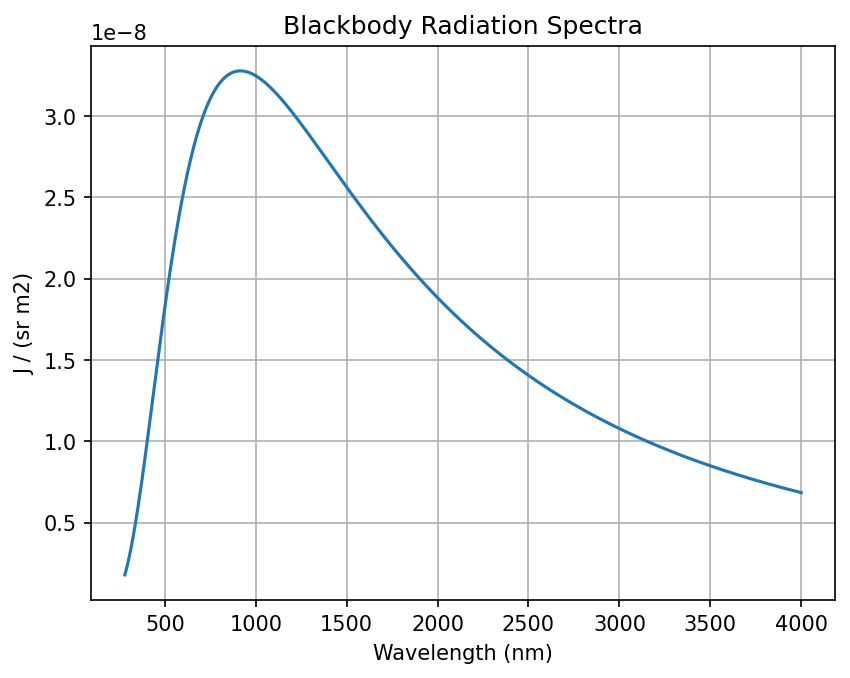

In [43]:
plt.style.use('seaborn-v0_8')
plt.style.use('default')
fig, axes = plt.subplots(nrows=1, ncols=1, dpi=150)
axes.plot(lambdas.to(u.nm), bb_intensity)
axes.set_xlabel('Wavelength (nm)')
axes.set_ylabel(bb_intensity.unit)
axes.set_title('Blackbody Radiation Spectra')
plt.grid(True)
plt.show()

## Intensity vs Frequency

In [31]:
bb = BlackBody(5770. * u.Kelvin)
nu = frequencies*u.Hz
nu[0], nu[-1]

(<Quantity 1.07068735e+15 Hz>, <Quantity 7.49481145e+13 Hz>)

In [32]:
bb_intensity = bb(nu) # cgs
bb_intensity = bb(nu).to(u.J/u.sr/u.m**2) # mks

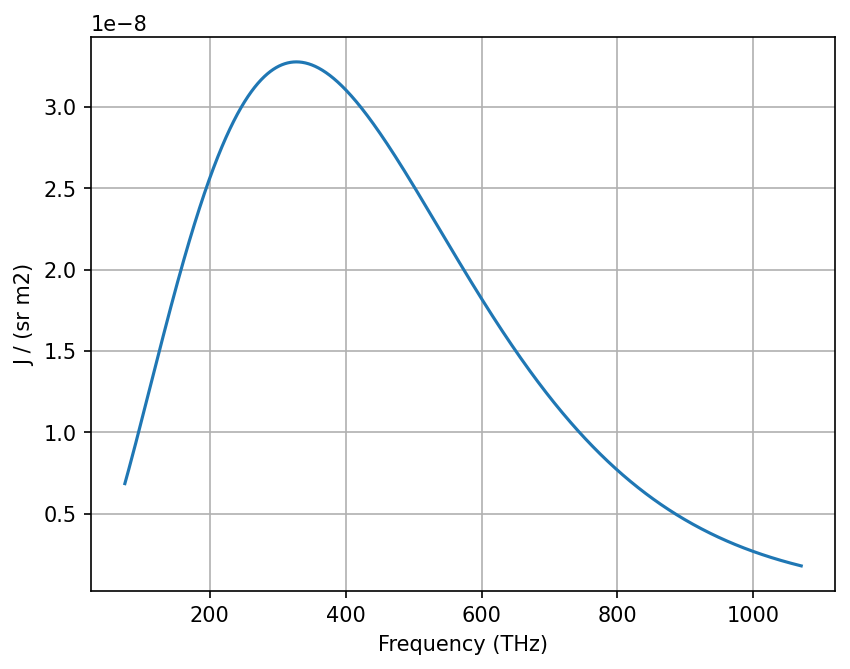

In [36]:
plt.style.use('seaborn-v0_8')
plt.style.use('default')
fig, axes = plt.subplots(nrows=1, ncols=1, dpi=150)
axes.plot(nu.to(u.THz), bb_intensity)
axes.set_xlabel('Frequency (THz)')
axes.set_ylabel(bb_intensity.unit)
plt.grid(True)
plt.show()

# AI Generated by Google

## Intensity vs Frequency

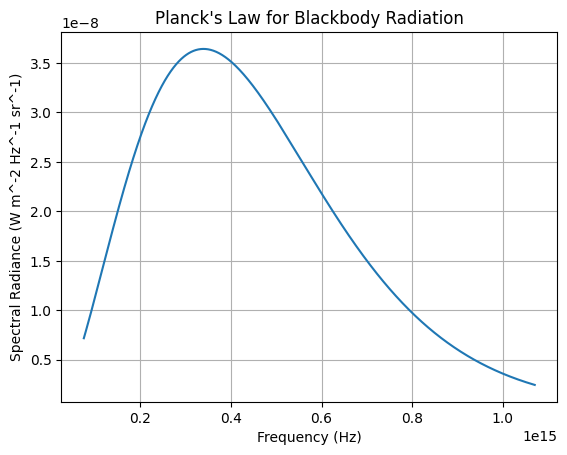

In [17]:
def planck_law_frequency(frequency, temperature):
    """
    Calculates the spectral radiance of a blackbody at a given frequency and temperature.

    Args:
        frequency (float or numpy.ndarray): Frequency in Hz.
        temperature (float): Temperature in Kelvin.

    Returns:
        float or numpy.ndarray: Spectral radiance in W m^-2 Hz^-1 sr^-1.
    """

    h = constants.Planck
    c = constants.c
    k = constants.k

    numerator = 2 * h * frequency**3
    denominator = c**2 * (np.exp((h * frequency) / (k * temperature)) - 1)
    return numerator / denominator

if __name__ == '__main__':
    # Define frequency range and temperature
    # frequencies = np.linspace(1e13, 1e15, 500)  # Frequency range from 10^13 to 10^15 Hz
    temperature = 5770  # Temperature of the blackbody in Kelvin

    # Calculate spectral radiance
    spectral_radiance = planck_law_frequency(frequencies, temperature)

    # Plot the results
    plt.style.use('seaborn-v0_8')
    plt.style.use('default')
    plt.plot(frequencies, spectral_radiance)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Spectral Radiance (W m^-2 Hz^-1 sr^-1)')
    plt.title('Planck\'s Law for Blackbody Radiation')
    plt.grid(True)
    plt.show()

## Intensity vs Wavelength

In [18]:
def planck_law_wavelength(wavelength, temperature):
    """
    Calculates the spectral radiance of a blackbody at a given wavelength and temperature.

    Args:
        wavelength (float or numpy.ndarray): Wavelength in meters.
        temperature (float): Temperature in Kelvin.

    Returns:
        float or numpy.ndarray: Spectral radiance in W/sr/m^3.
    """
    h = constants.Planck
    c = constants.c
    k = constants.k

    a = 2 * h * c**2
    b = h * c / (wavelength * k * temperature)
    intensity = a / ((wavelength**5) * (np.exp(b) - 1))
    return intensity

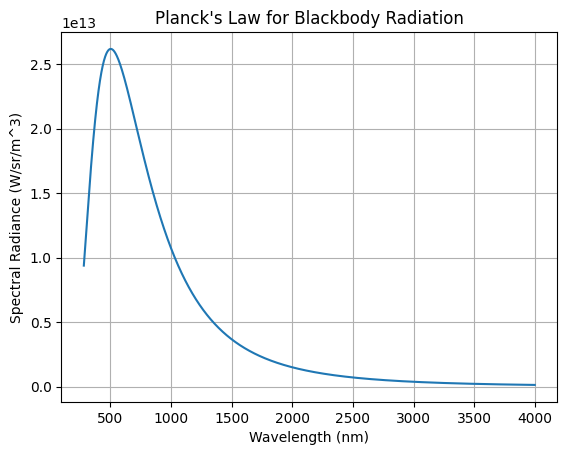

In [19]:
if __name__ == '__main__':
    # Define frequency range and temperature
    # frequencies = np.linspace(1e13, 1e15, 500)  # Frequency range from 10^13 to 10^15 Hz
    temperature = 5770  # Temperature of the blackbody in Kelvin

    # Calculate spectral radiance
    intensity = planck_law_wavelength(wavelengths, temperature)

    # Plot the results
    plt.plot(wavelengths*1e9, intensity)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Spectral Radiance (W/sr/m^3)')
    plt.title('Planck\'s Law for Blackbody Radiation')
    plt.grid(True)
    plt.show()

# Intensity vs Wavelength as a Function of Temperature

## AI Generated

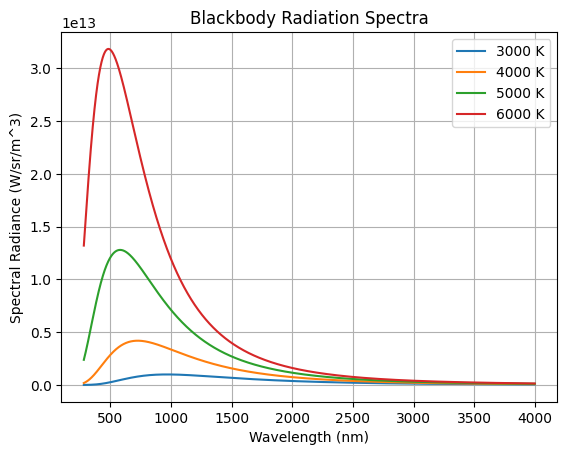

In [20]:
if __name__ == '__main__':
    # Define wavelengths and temperatures
    # wavelengths = np.linspace(1e-9, 3e-6, 500)  # 1 nm to 3000 nm
    temperatures = [3000, 4000, 5000, 6000]

    # Plot the blackbody spectra for different temperatures
    for T in temperatures:
        intensity = planck_law_wavelength(wavelengths, T)
        plt.plot(wavelengths * 1e9, intensity, label=f'{T} K')

    # Customize the plot
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Spectral Radiance (W/sr/m^3)')
    plt.title('Blackbody Radiation Spectra')
    plt.legend()
    plt.grid(True)
    plt.show()

## Astropy

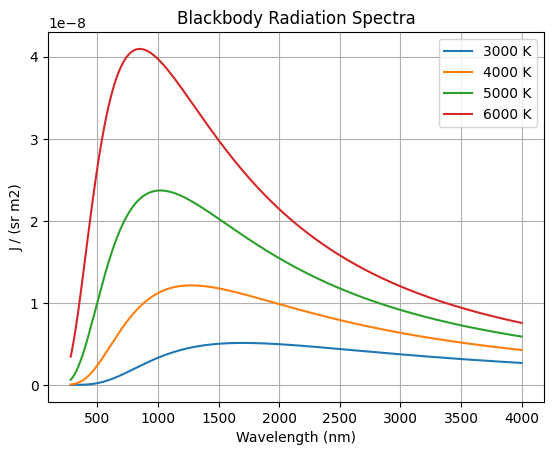

In [30]:
plt.style.use('default')
# Define wavelengths and temperatures
# wavelengths = np.linspace(1e-9, 3e-6, 500)  # 1 nm to 3000 nm
temperatures = [3000, 4000, 5000, 6000]
lambdas = wavelengths*u.m


# Plot the blackbody spectra for different temperatures
for T in temperatures:
    bb = BlackBody(T * u.Kelvin)
    bb_intensity = bb(lambdas) # cgs
    bb_intensity = bb(lambdas).to(u.J/u.sr/u.m**2) # mks
    plt.plot(lambdas.to(u.nm), bb_intensity, label=f'{T} K')

# Customize the plot
plt.xlabel('Wavelength (nm)')
plt.ylabel(bb_intensity.unit)
plt.title('Blackbody Radiation Spectra')
plt.legend()
plt.grid(True)
plt.show()

#

In [27]:
# cgs to mks
bb(lambdas).to(u.J/u.sr/u.m**2)

<Quantity [3.45424600e-09, 3.48867019e-09, 3.52327975e-09, ...,
           7.59098905e-09, 7.57513149e-09, 7.55932258e-09] J / (sr m2)>